### Matplotlib

In [1]:
import matplotlib.pyplot as plt

In [2]:
# notebook 交互式绘图，还是 inline 好用
# %matplotlib notebook
%matplotlib inline

In [3]:
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

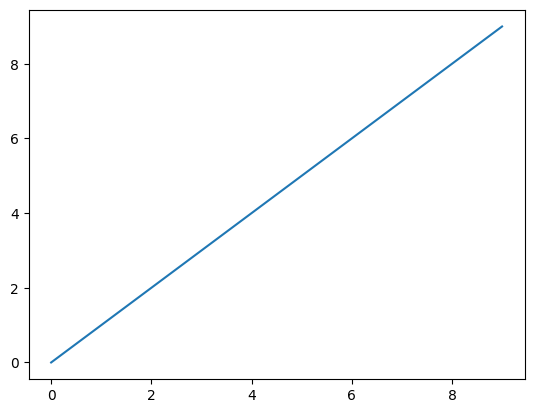

In [4]:
plt.plot(data)

#### 图片与子图

In [5]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [6]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# 由于使用了 %matplotlib notebook，创建figure时就会显示空白图
# 运行上面三行添加三幅子图，也会实时刷新在上面

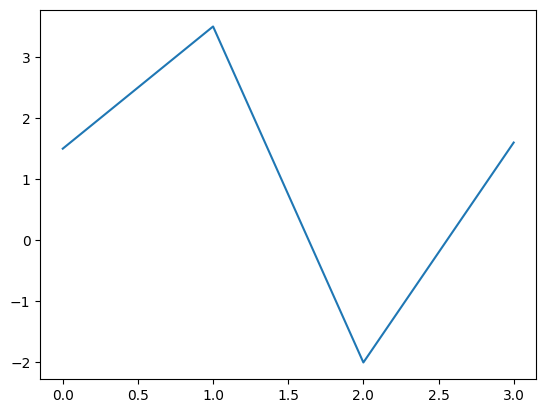

In [7]:
plt.plot([1.5, 3.5, -2, 1.6])  # 会在最后一个子图上绘制，但换成 inline 模式就不是了

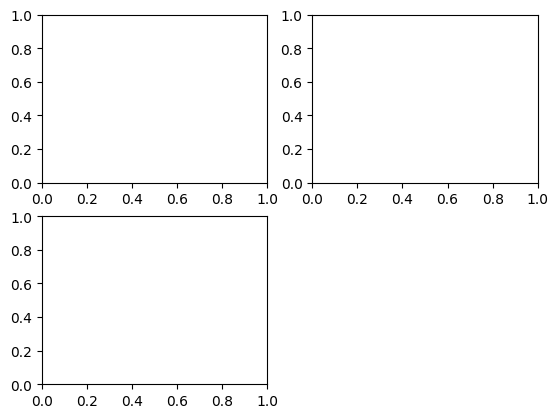

In [8]:
fig

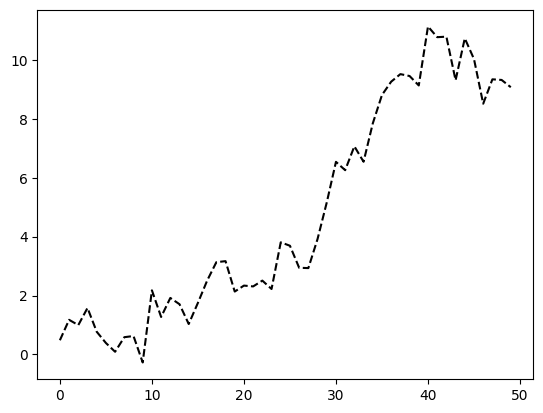

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--')  # k-- 黑色分段线

In [10]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

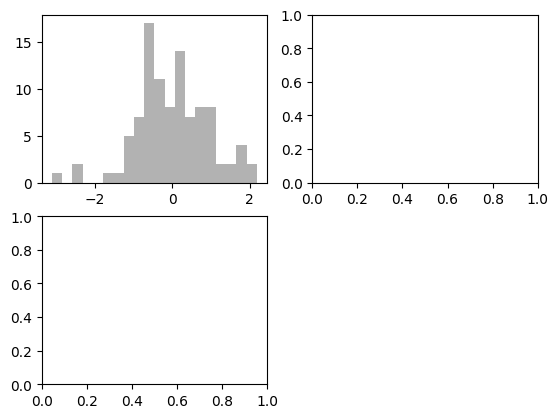

In [11]:
fig

In [12]:
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

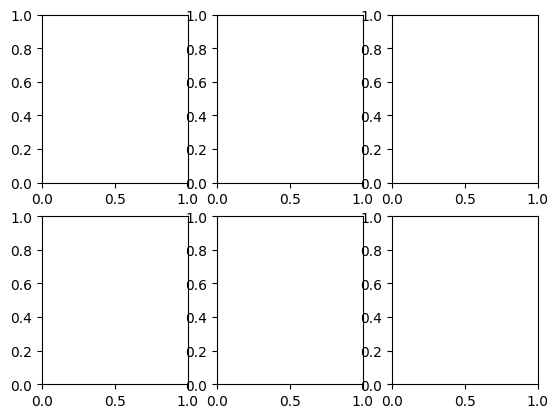

In [13]:
fig, axes = plt.subplots(2, 3)  # 创建一个图片，同时返回生成的子图对象的Numpy数组

In [14]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

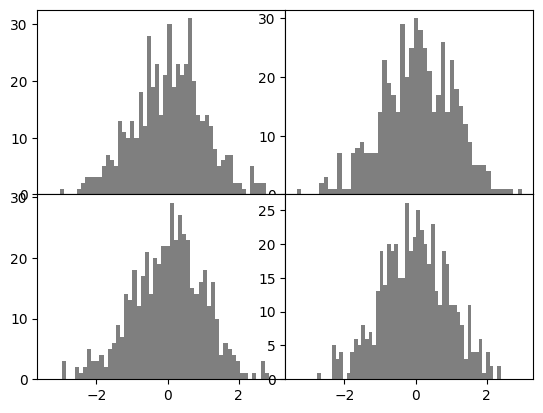

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)  # 调整间距，可观察到标签存在重叠，matplotlib不会自动检查标签重叠
# 需要通过显式指定刻度位置和刻度标签来修复标签的显示

#### 颜色、标记和线类型

In [16]:
# 可以查看plot支持的颜色线型等信息
# plt.plot?

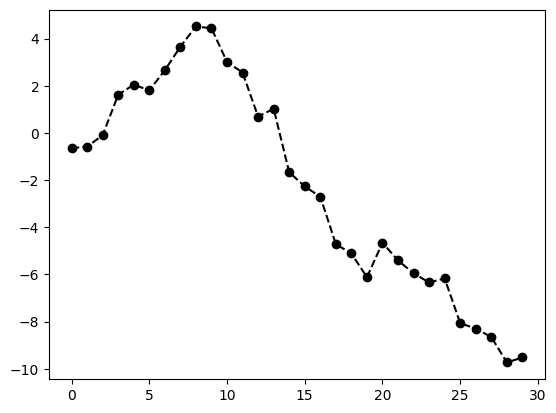

In [17]:
from numpy.random import randn
plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')

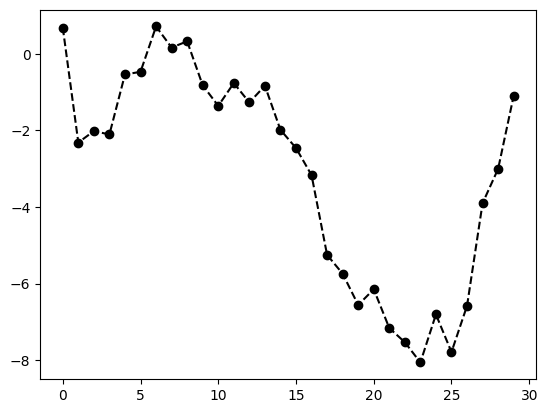

In [18]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')  # 更显式指定线型和标记

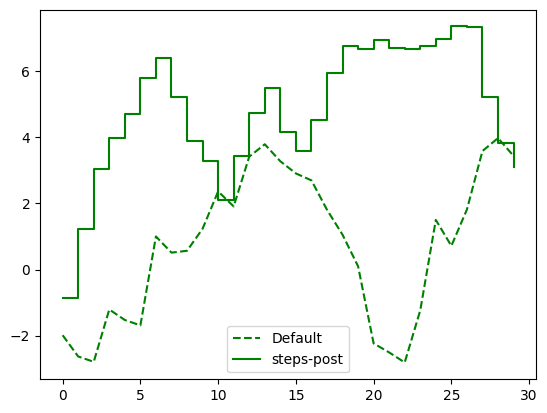

In [19]:
# 指定中间插值点的方式
plt.plot(randn(30).cumsum(), 'g--', label='Default')
plt.plot(randn(30).cumsum(), 'g-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')  # 显式调用 legend 生成图例

#### 刻度、标签和图例

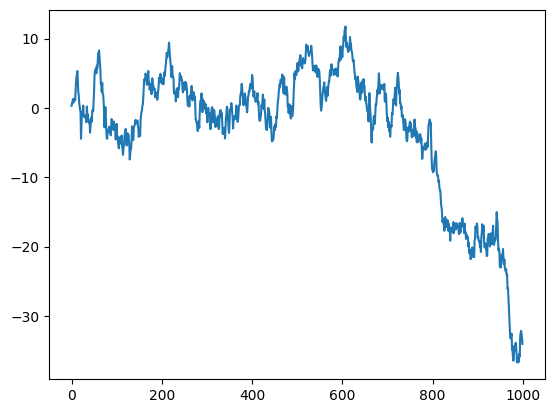

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [21]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [22]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [23]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [24]:
ax.set_xlabel('Stages')

Text(0.5, 4.444444444444445, 'Stages')

In [25]:
# 批量设置绘图属性
props = {
    'title': 'My *',
    'xlabel': 'Sta*'
}
ax.set(**props)

[Text(0.5, 1.0, 'My *'), Text(0.5, 4.444444444444445, 'Sta*')]

In [26]:
ax.text(0, 0, 'Hello world!', family='monospace', fontsize=10)

Text(0, 0, 'Hello world!')

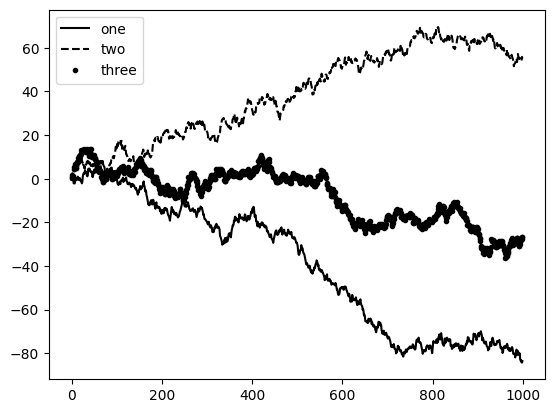

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

#### 注释与子图加工

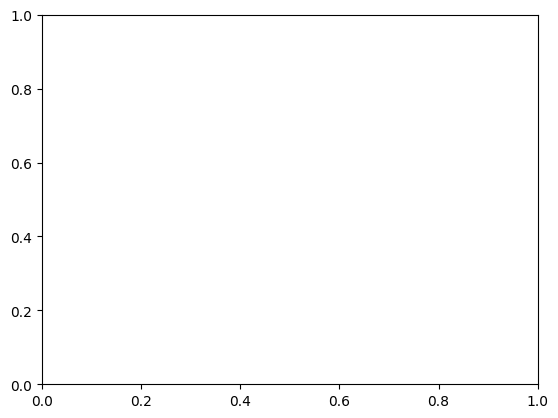

In [28]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [29]:
import pandas as pd
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
data

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25


In [30]:
spx = data['SPX']
spx.plot(ax=ax, style='k-')

<AxesSubplot:xlabel='Date'>

In [31]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Strearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

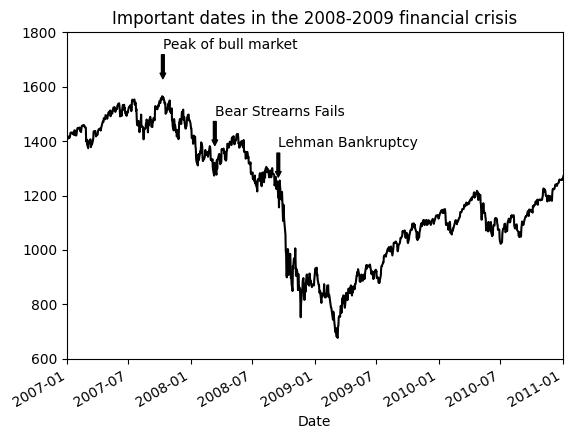

In [32]:
fig

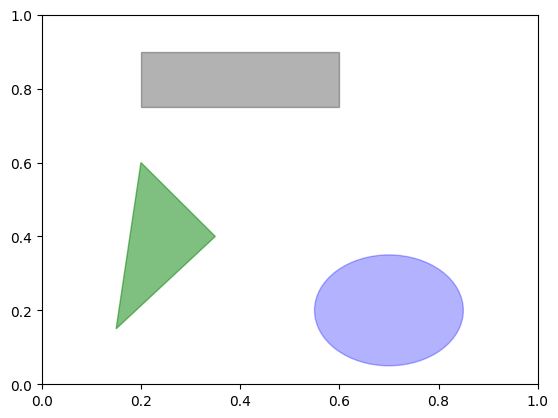

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)  # 将图形对象添加到子图中
ax.add_patch(circ)
ax.add_patch(pgon)

In [34]:
plt.savefig('figpath.pdf')  # 文件类型会根据扩展名推断

<Figure size 640x480 with 0 Axes>

In [35]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [36]:
# 并不一定要写入硬盘，还能写到文件型对象中，例如BytesIO
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 640x480 with 0 Axes>

In [37]:
plt.rcParams.update(plt.rcParamsDefault)  # 重置rc，%matplotlib notebook也会失效

In [38]:
# 使用rc方法修改配置
plt.rc('figure', figsize=(5, 5))  # 注意，前面绘制的图不受影响

In [39]:
font_options = {'family': 'monospace',
                'weight': 'bold',
                'size'  : 10}
plt.rc('font', **font_options)

In [40]:
# 使用.matplotlibrc文件定制设置

### 9.2 pandas 和 Seaborn 绘图

In [41]:
plt.rcParams.update(plt.rcParamsDefault)  # 重置rc，%matplotlib notebook也会失效

In [42]:
%matplotlib inline

In [43]:
# seaborn 内部使用了matplotlib的设置系统，底层依赖matplotlib
# 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，所以即使不喜欢 seaborn 的API，也可以导入 seaborn 让 matplotlib 更美观

#### 折线图

In [44]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [45]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     0.855189
10    0.401876
20   -0.178530
30    0.254940
40   -0.763797
50   -1.477545
60   -2.063148
70   -2.641820
80   -3.650197
90   -3.718716
dtype: float64

<AxesSubplot:>

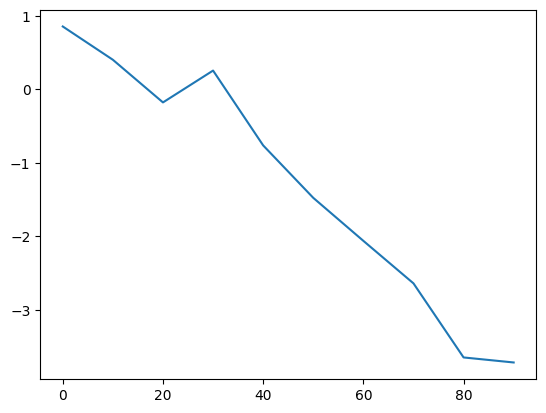

In [46]:
s.plot()

<AxesSubplot:>

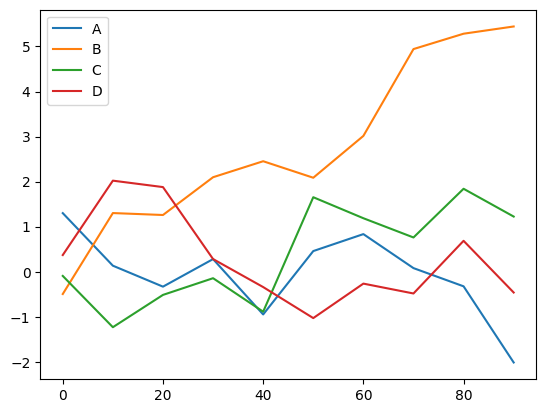

In [47]:
#fig = plt.figure()  # 不需要一句，df.plot会自动生成新的画板
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()  # 可以指定kind绘图类型，默认line，即等价于df.plot.line()

#### 柱状图

<AxesSubplot:>

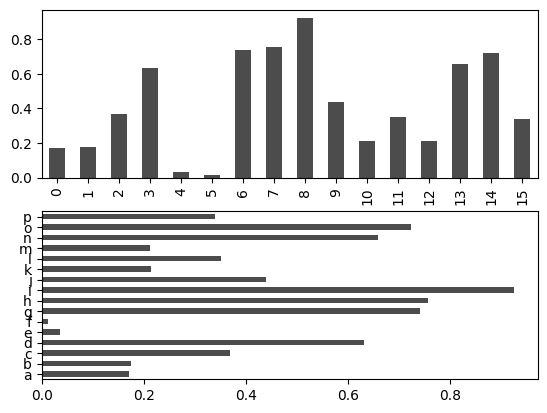

In [48]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7, use_index=False)  # 不使用所有作为刻度标签
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [49]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.904058,0.870450,0.076427,0.471160
two,0.155850,0.666853,0.786343,0.663591
three,0.572156,0.003203,0.793212,0.111178
four,0.845283,0.389938,0.905868,0.629591
five,0.549245,0.485157,0.110704,0.920424
six,0.755045,0.628319,0.195936,0.233129


<AxesSubplot:>

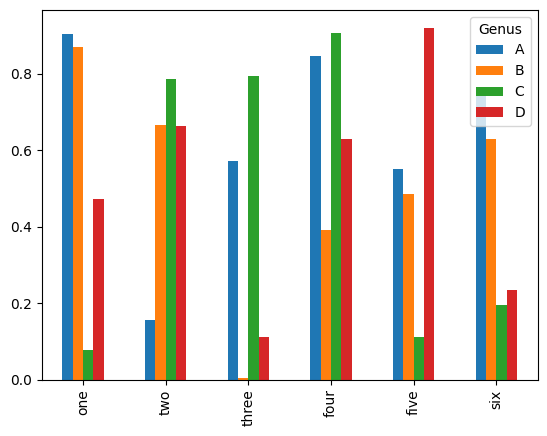

In [50]:
df.plot.bar()

<AxesSubplot:>

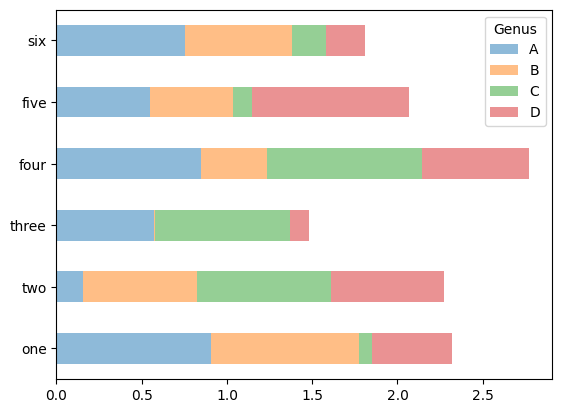

In [51]:
df.plot.barh(stacked=True, alpha=0.5)

In [52]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [53]:
party_counts = party_counts.loc[:, 2:5]  # 没有太多的1人和6人派对

In [54]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)  # 标准化至和为1
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

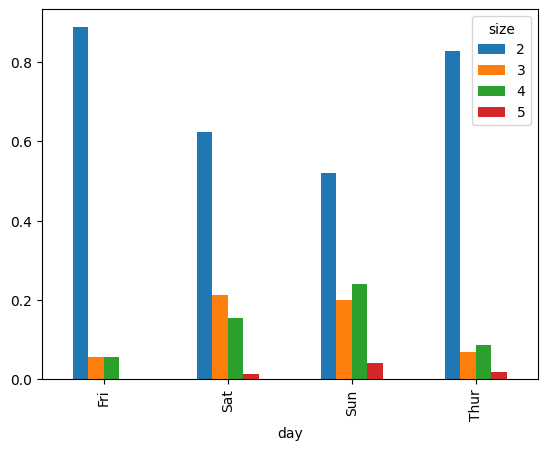

In [55]:
party_pcts.plot.bar()

In [56]:
# 对于在绘图前需要聚合和汇总的数据，使用seaborn包会更方便
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

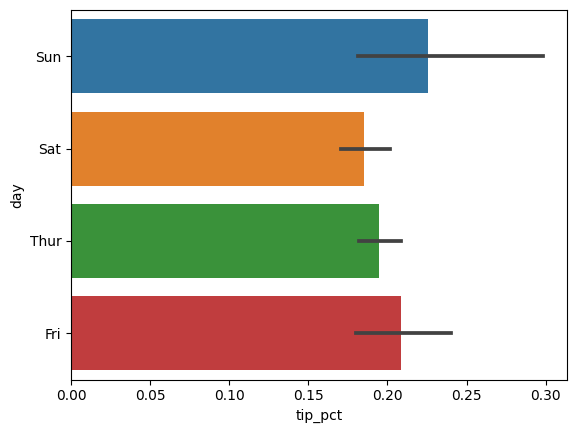

In [57]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [58]:
sns.set(style='whitegrid')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

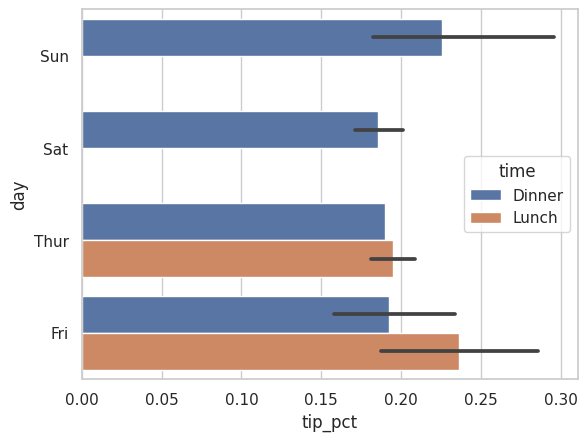

In [59]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

#### 直方图和密度图

<AxesSubplot:ylabel='Frequency'>

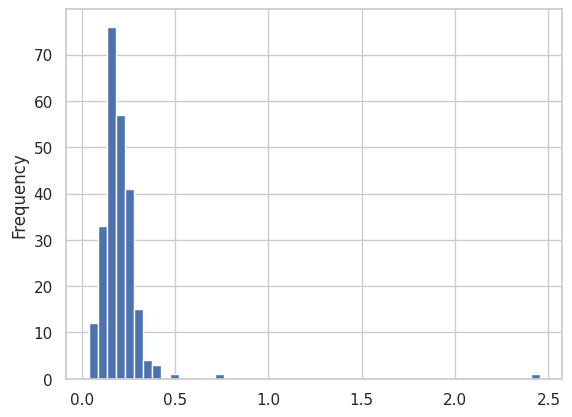

In [60]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

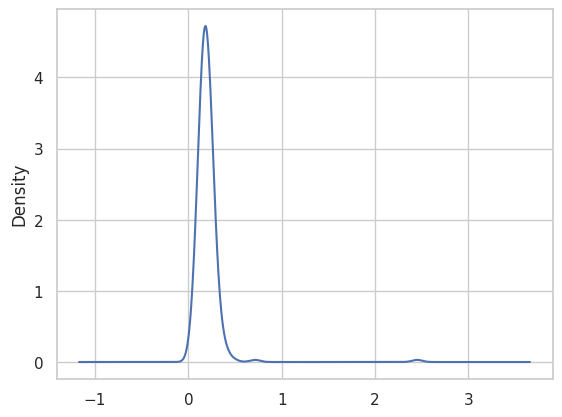

In [61]:
tips['tip_pct'].plot.density()  # 密度图

/home/user/.pyenv/versions/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


<AxesSubplot:ylabel='Density'>

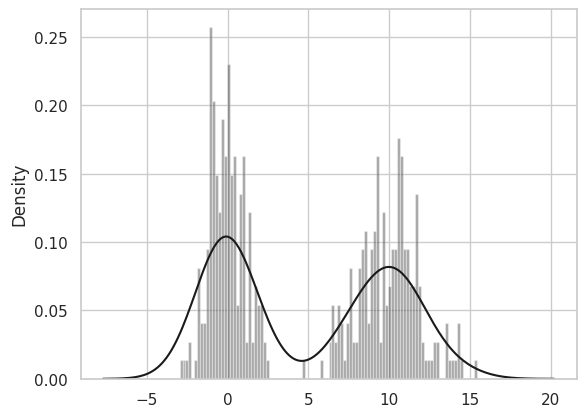

In [62]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')
# sns.histplot(values, bins=100, color='k')

#### 散点图或点图

In [63]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

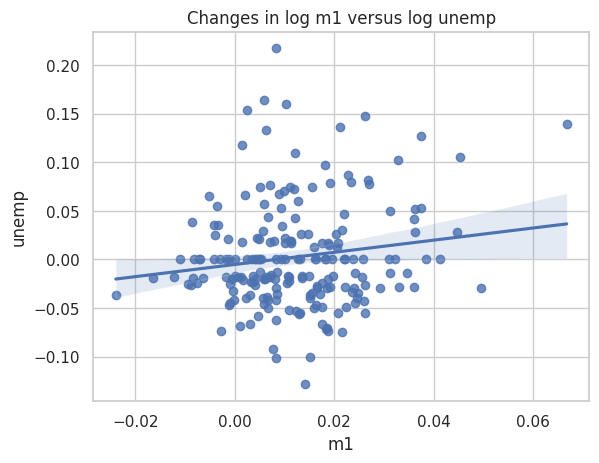

In [64]:
sns.regplot(data=trans_data, x='m1', y='unemp')
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

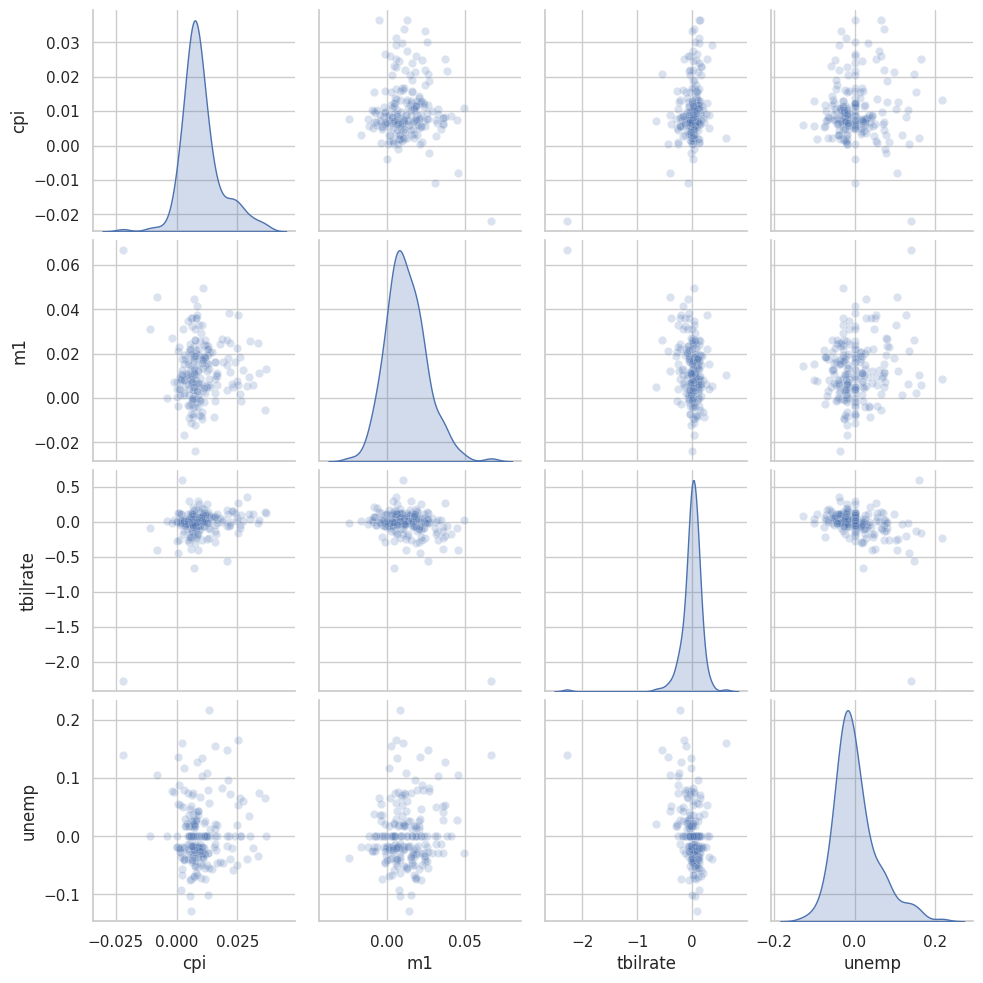

In [65]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

#### 分面网格和分类数据

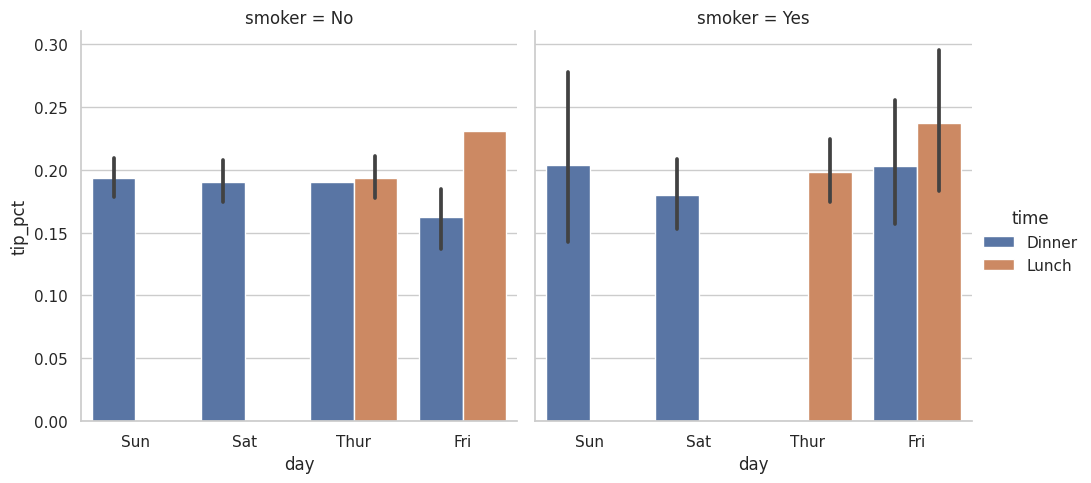

In [66]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])
# 按星期/时间/是否吸烟划分的小费百分比

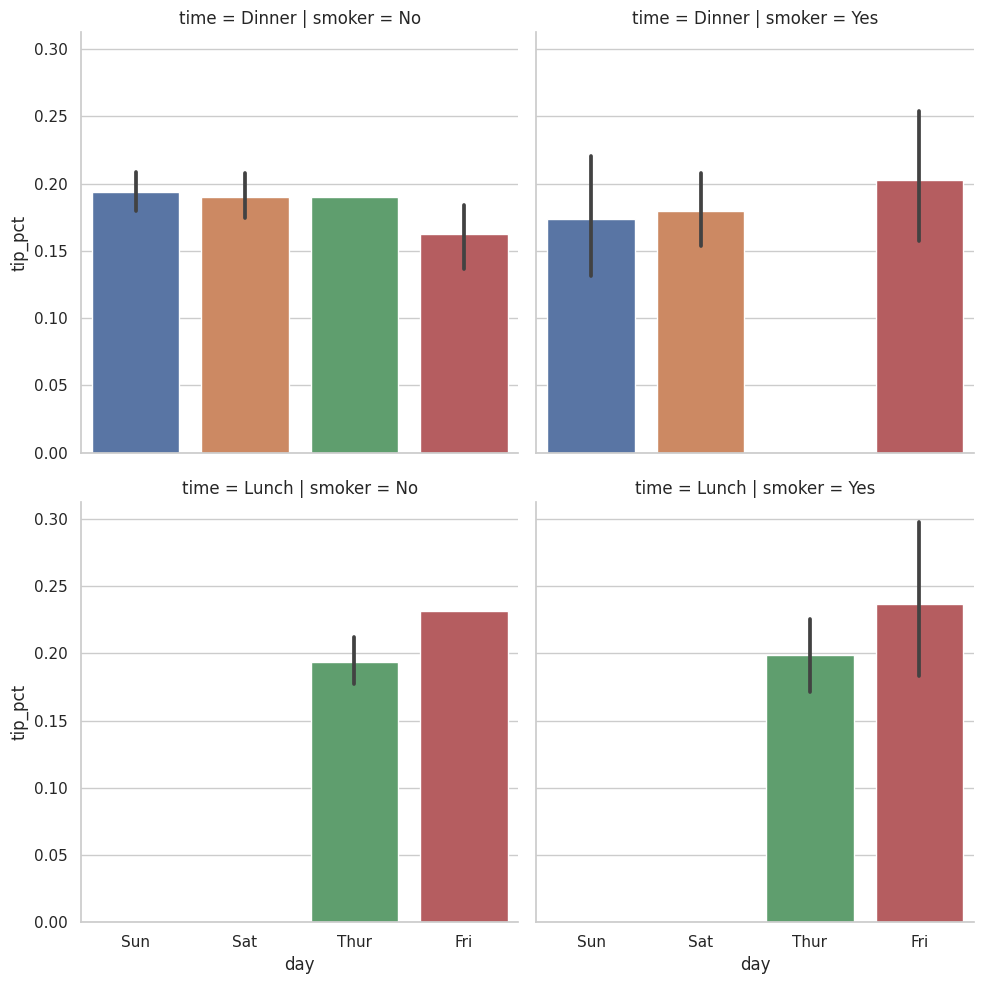

In [67]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 0.5])

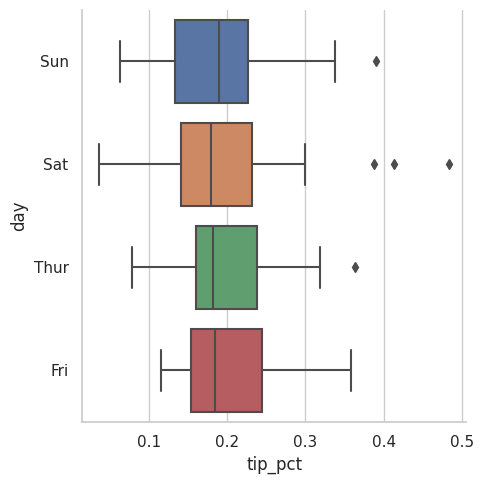

In [68]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])